In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Loading Data**

In [7]:
df = pd.read_csv('./Wholesale customers data.csv')
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# **Feature Extraction**

In [10]:
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[features]

# **Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Finding the value of k**

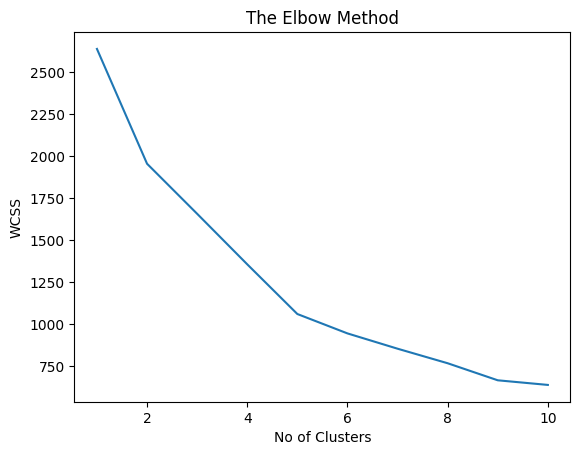

In [13]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

# **Cluster Assignment**

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
df['cluster'] = kmeans.fit_predict(X)

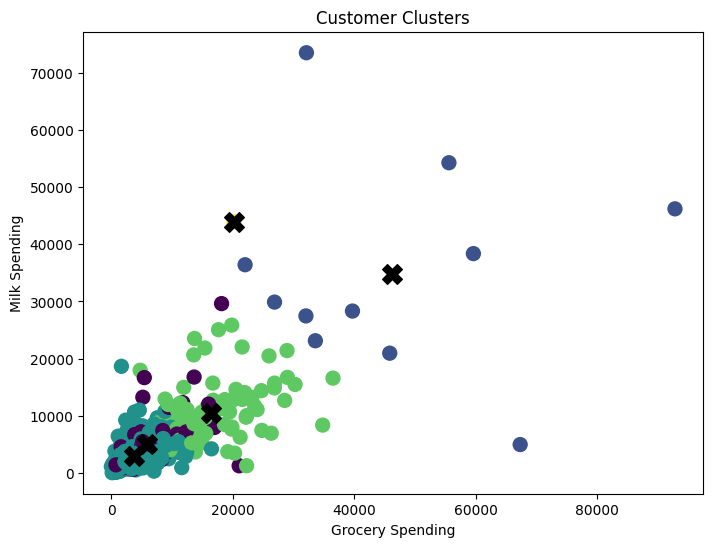

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(df['Grocery'], df['Milk'], c=df['cluster'], s=100)

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,2], centers[:,1], marker='X', s=200, c='black')

plt.xlabel("Grocery Spending")
plt.ylabel("Milk Spending")
plt.title("Customer Clusters")
plt.show()

# **Cluster Profiling**

In [21]:
cluster_profile = df.groupby('cluster')[features].mean()
cluster_profile

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,32957.984127,4997.349206,5884.761905,8422.841270,954.603175,2462.968254
1,16911.090909,34864.363636,46126.181818,3245.454545,23008.090909,4177.363636
2,9115.319703,2954.368030,3785.810409,2276.747212,978.609665,976.349442
3,5509.250000,10555.635417,16477.927083,1420.125000,7199.406250,1658.791667
4,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000


In [23]:
kmeans_alt = KMeans(n_clusters=4, random_state=99)
df['cluster_alt'] = kmeans_alt.fit_predict(X)

(df['cluster'] == df['cluster_alt']).value_counts()

False    438
True       2
Name: count, dtype: int64